In [39]:
import ROOT
import copy
import numpy as np

In [40]:
tree = ROOT.TChain("dihadron_cuts")
tree.Add("../projects/test/volatile/data/piplus_piminus/MC_RGA_*.root")


20

In [48]:
def draw_histograms(data, variable, bins, xmin, xmax, x_label, y_range=None):
    ROOT.gStyle.SetOptStat(0)
    c = ROOT.TCanvas("c", "c", 600, 600)
    ROOT.gPad.SetTopMargin(0.15)
    
    hist1 = ROOT.TH1F("hist1", "", bins, xmin, xmax)
    hist4 = ROOT.TH1F("hist4", "", bins, xmin, xmax)

    data.Draw(f"gen_{variable}>>hist1","gen_passDihadron", "P")
    data.Draw(f"rec_{variable}>>hist4","rec_passDihadron", "P same")

    hist1.SetMarkerStyle(20)
    hist4.SetMarkerStyle(23)

    hist1.SetMarkerColor(ROOT.kBlue)
    hist4.SetMarkerColor(ROOT.kBlack)


    legend = ROOT.TLegend(0.1, 0.85, 0.9, 0.95)
    legend.SetNColumns(2)
    legend.AddEntry(hist1, f"{variable}_{{gen}}", "p")
    legend.AddEntry(hist4, f"{variable}_{{rec}}", "p")
    legend.Draw()

    hist1.GetXaxis().SetTitle(x_label)
    
    if y_range is not None:
        hist1.GetYaxis().SetRangeUser(y_range[0], y_range[1])

    c.Draw()
    return copy.deepcopy(c)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


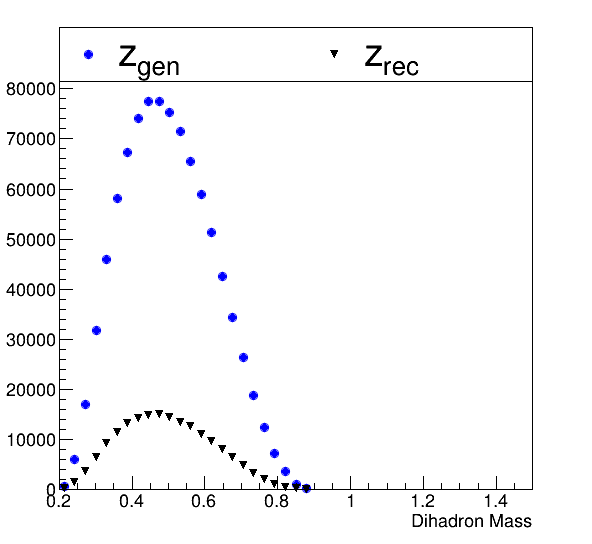

In [43]:
canvas = draw_histograms(
    tree, 
    variable='z', 
    bins=45, 
    xmin=0.2, 
    xmax=1.5, 
    x_label='Dihadron Mass'
)
canvas.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


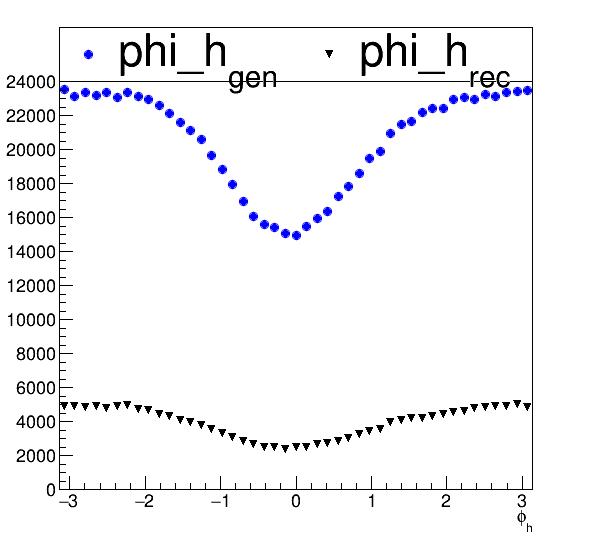

In [49]:
canvas = draw_histograms(
    tree, 
    variable='phi_h', 
    bins=45, 
    xmin=-3.1415, 
    xmax=3.1415, 
    x_label='#phi_{h}',
    y_range=(0,24000)
)
canvas.Draw()

In [45]:
tree.GetEntries()

24751351